<a href="https://colab.research.google.com/github/raksdayal1/DataDrivenAerospaceEngg/blob/main/MyDMDVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description: This is my version of DMD which I coded following the steps in the text book**




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f1 = lambda xx, tt: 2 * np.cos(xx) * np.exp(1j * tt)
f2 = lambda xx, tt: np.sin(xx) * np.exp(3j * tt)

In [3]:
xi = np.linspace(-10, 10, 400)
t = np.linspace(0, 4 * np.pi, 201)
dt = t[1] - t[0]
xx, tt = np.meshgrid(xi, t)
X = f1(xx, tt) + f2(xx, tt)

In [4]:
X1 = X.T[:,:-1] # This is X, x on xaxis and t on y axis
X2 = X.T[:,1:] # This is XPrime

def DMD(X1, X1_prime, r):
  # Svd of X1
  U,Sigma,Vh = np.linalg.svd(X1, full_matrices=False) # Vh is conjugate transpose of V. The return of SVD in numpy is the conjugate transpose
  U = U[:, :r]
  Sigma = Sigma[:r]
  Vh = Vh[:r,:]
  Sigma_mat = np.diag(Sigma)
  print(X1.shape, Sigma.shape)
  Atilde = np.conjugate(U.T) @ X1_prime @ np.conjugate(Vh.T) @ np.linalg.inv(Sigma_mat)
  print(Atilde.shape)

  #Take eigen decomp of Atilde
  Lambda, W = np.linalg.eig(Atilde) # Lambda is eigen values matrix and W is the eigenvector matrix

  Omega = np.log(Lambda)/dt
  print(f"Lambda shape = {Lambda.shape}, W shape = {W.shape}, Omega shape = {Omega.shape}")

  Phi = X1_prime @ np.conjugate(Vh.T) @  np.linalg.inv(Sigma_mat) @ W
  print(f"Phi shape = {Phi.shape}")

  b = np.linalg.pinv(Phi) @ X1[:,0]
  print(f"b shape = {b.shape}")

  return Phi, Omega, b

In [5]:
Phi, Omega, b = DMD(X1, X2, 3)
Time = t[:-1].reshape((-1,t[:-1].shape[0]))
Omega = Omega.reshape((-1,Omega.shape[0]))
T_omega = np.exp(Omega.T @ Time)
print(f"T(W) shape = {T_omega.shape}")

(400, 200) (3,)
(3, 3)
Lambda shape = (3,), W shape = (3, 3), Omega shape = (3,)
Phi shape = (400, 3)
b shape = (3,)
T(W) shape = (3, 200)


In [6]:
X_dmd = Phi @ np.diag(b) @ T_omega
print(X_dmd.shape)

(400, 200)


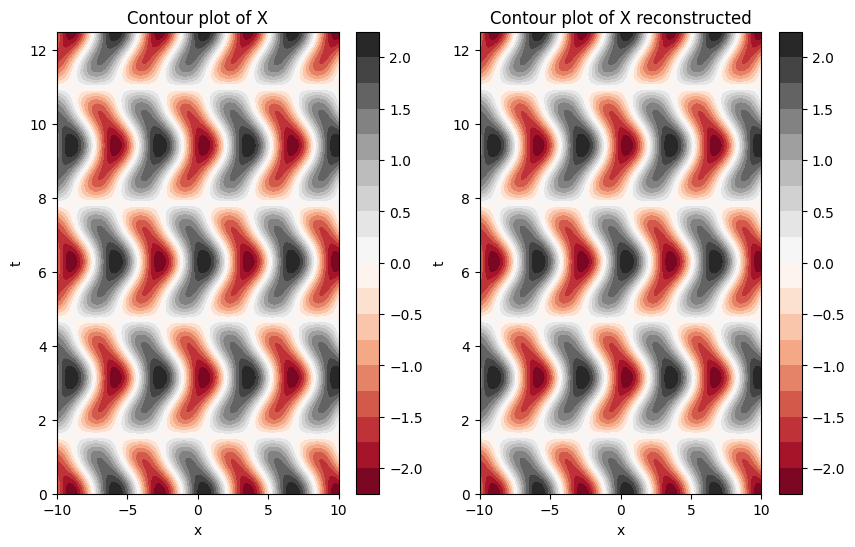

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.contourf(xx[:-1], tt[:-1], np.real(X[:-1,:]), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1,2,2)
plt.contourf(xx[:-1], tt[:-1], np.real(X_dmd.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X reconstructed')
plt.show()

